#torch.nn.Conv2d()
#torch.nn.functional.conv2d()

In [1]:
import numpy as np
import torch
from torch import nn
from torch.autograd import Variable
import torch.nn.functional as F
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
im = Image.open('./1.jpg').convert('L')
im = np.array(im, dtype='float32')

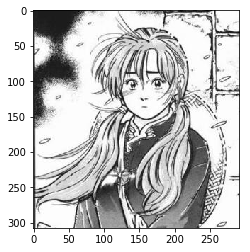

In [4]:
plt.imshow(im.astype('uint8'), cmap='gray')

In [7]:
im = torch.from_numpy(im.reshape((1,1,im.shape[0],im.shape[1])))

In [8]:
conv1 = nn.Conv2d(1,1,3,bias=False)

sobel_kernel = np.array([[-1,-1,-1],[-1,8,-1],[-1,-1,-1]], dtype='float32')

sobel_kernel = sobel_kernel.reshape((1,1,3,3))

conv1.weight.data = torch.from_numpy(sobel_kernel)

edge1 = conv1(Variable(im))
edge1 = edge1.data.squeeze().numpy()

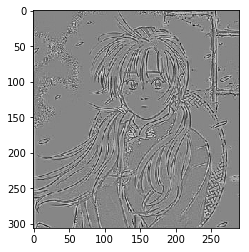

In [9]:
plt.imshow(edge1, cmap='gray')

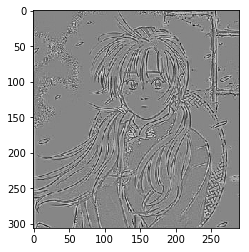

In [11]:
sobel_kernel = np.array([[-1,-1,-1],[-1,8,-1],[-1,-1,-1]], dtype='float32')
                        
sobel_kernel = sobel_kernel.reshape((1,1,3,3))

weight = torch.from_numpy(sobel_kernel)
edge2 = F.conv2d(Variable(im), weight)
edge2 = edge2.data.squeeze().numpy()
plt.imshow(edge2, cmap='gray')

In [14]:
pool1 = nn.MaxPool2d(2,2)
print('before max pook, image shape:{} x {}'.format(im.shape[2], im.shape[3]))
small_im1 = pool1(Variable(im))
small_im1 = small_im1.data.squeeze().numpy()
print('after max pool, image shape: {} x {}'.format(small_im1.shape[0],small_im1.shape[1]))

before max pook, image shape:308 x 292
after max pool, image shape: 154 x 146


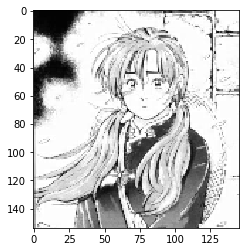

In [15]:
plt.imshow(small_im1, cmap='gray')

before max pool, image shape:308 x 292
after max pool, image shape: 154 x 146


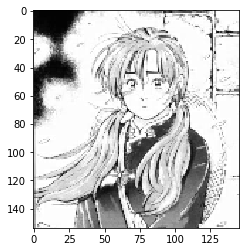

In [16]:
print('before max pool, image shape:{} x {}'.format(im.shape[2], im.shape[3]))
small_im2 = F.max_pool2d(Variable(im),2,2)
small_im2 = small_im2.data.squeeze().numpy()
print('after max pool, image shape: {} x {}'.format(small_im2.shape[0], small_im2.shape[1]))
plt.imshow(small_im2, cmap='gray')